In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [12]:
(xtrain,_),(xtest,_)=mnist.load_data()

In [14]:
xtrain.shape

(60000, 28, 28)

In [15]:
xtest.shape

(10000, 28, 28)

In [16]:
xtrain.ndim

3

In [17]:
xtest=xtest.reshape(10000,784)

In [18]:
xtest.ndim

2

In [19]:
xtrain=xtrain.reshape(60000,784)

In [20]:
xtrain.ndim

2

In [21]:
xtrain=xtrain.astype('float')/255
xtest=xtest.astype('float')/255

In [22]:
xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
from tensorflow.keras.layers import Input

In [28]:
x=Input(shape=(784,))
h=Dense(60,activation='relu')(x)
r=Dense(784,activation='sigmoid')(h)

ad=Model(inputs=x,outputs=r)

In [30]:
ad.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 60)                47100     
                                                                 
 dense_3 (Dense)             (None, 784)               47824     
                                                                 
Total params: 94,924
Trainable params: 94,924
Non-trainable params: 0
_________________________________________________________________


In [31]:
ad.compile(optimizer='adam',loss='mse')


In [32]:
history=ad.fit(xtrain,xtrain,
              epochs=20,
              batch_size=128,
              validation_data=(xtest,xtest))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0460 - val_loss: 0.0232
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0180 - val_loss: 0.0134
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0114 - val_loss: 0.0091
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0047 - val_loss: 0.0045

In [33]:
decode=ad.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [34]:
decode

array([[3.1688899e-07, 5.5872574e-06, 3.4075426e-06, ..., 6.1042449e-08,
        5.1987181e-06, 1.2594176e-06],
       [2.4472849e-08, 2.2645388e-08, 1.7293538e-09, ..., 3.2815866e-09,
        1.4939501e-09, 4.5538401e-10],
       [9.5267729e-05, 1.6649760e-04, 1.3701140e-04, ..., 1.2560359e-04,
        2.7985458e-04, 2.0777986e-04],
       ...,
       [1.9136570e-10, 3.0723637e-09, 2.1468733e-09, ..., 7.8249546e-11,
        8.8725960e-09, 2.6186592e-10],
       [4.6867794e-09, 1.9783519e-08, 3.8658503e-09, ..., 5.1425403e-10,
        8.9333367e-09, 3.6019787e-10],
       [3.6543667e-12, 4.6413672e-12, 1.7446317e-11, ..., 2.7835551e-12,
        2.2443586e-12, 3.5688627e-12]], dtype=float32)

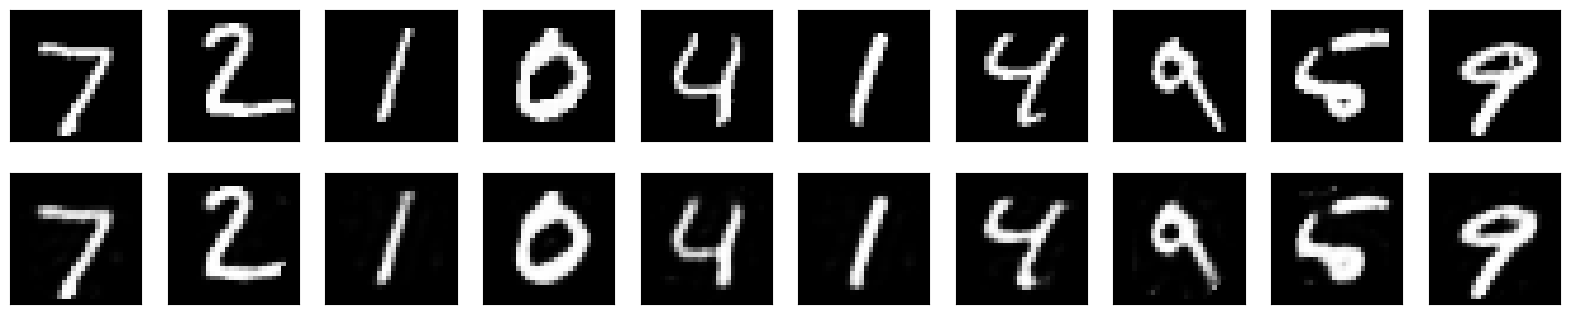

In [35]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decode[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [36]:
ad.evaluate(xtrain,xtrain)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0043


0.004287807736545801

In [37]:
ad.evaluate(xtest,xtest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0042


0.0042136916890740395

In [39]:
encoder=Model(x,h)
encoded_img=encoder.predict(xtest)

313/313 [==============================] - 1s 2ms/step


# Multilayer encoder